# Naive Bayes

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from tabulate import tabulate

sys.path.append('../src') # permite importar modulos locales

In [2]:
from arff_helper import DataSet
from metrics import accuracy_score, recall_score 
from classifier import NBClassifier
from kfold import KFold

# Ejemplo Clase

In [3]:
ds = DataSet()
ds.load_from_arff('../datasets/dataset_clase.arff')
target_attribute='Juega'
classifier = NBClassifier(target_attribute, ds.attribute_info, ds.attribute_list)
X = ds.pandas_df.drop(columns=target_attribute)
y = ds.pandas_df[target_attribute]
classifier.fit (X, y)

errors = 0
for i in range (ds.pandas_df.shape[0]):
    instance = ds.pandas_df.loc[i]
    predict_result = classifier.predict(instance)
    print(f'Real value : {instance[target_attribute]}, Predicted: {predict_result}')
    if instance[target_attribute] != predict_result:
        errors = errors + 1
print(f'Cantidad de errores: {errors}')        


Real value : NO, Predicted: NO
Real value : NO, Predicted: NO
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: NO
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : YES, Predicted: YES
Real value : NO, Predicted: NO
Cantidad de errores: 1


## Evaluación del algoritmo

1. Separe 4/5 del conjunto de entrenamiento y realice una validación cruzada de tamaño 10.

2. Con el 1/5 no utilizado en la parte previa evalúe al resultado de entrenar con los 4/5 restantes.

Metricas:

    Acuracy: Se calcula la proporcion de predicciones correctas.
    Recall: Se calcula que proporción de positivos reales se identificaron correctamente.



K fold validation :

  #    Accuracy    Recall
---  ----------  --------
  1    0.894737  0.8
  2    0.929825  0.9
  3    0.894737  0.9
  4    0.982456  1
  5    0.894737  0.882353
  6    1         1
  7    0.947368  0.954545
  8    0.929825  0.923077
  9    0.947368  0.857143
 10    0.94      0.866667
  1    0.894737  0.8
  2    0.929825  0.9
  3    0.894737  0.9
  4    0.982456  1
  5    0.894737  0.882353
  6    1         1
  7    0.947368  0.954545
  8    0.929825  0.923077
  9    0.947368  0.857143
 10    0.94      0.866667

T=1/5 S=4/5 :

  #    Accuracy    Recall
---  ----------  --------
  9    0.929078  0.810811
  9    0.929078  0.810811


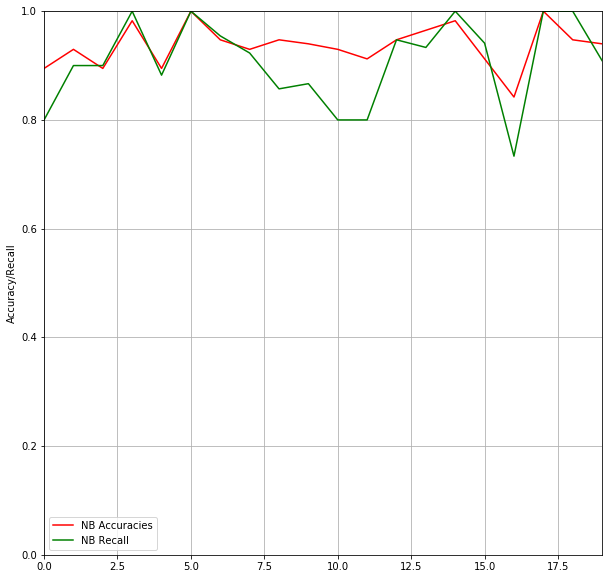

In [5]:
training_ds = DataSet ()
training_ds.load_from_arff ('../datasets/Autism-Adult-Training-Subset.arff')

test_ds = DataSet ()
test_ds.load_from_arff ('../datasets/Autism-Adult-Test-Subset.arff')

training_df = training_ds.pandas_df
test_pandas_df = test_ds.pandas_df

n = 2
k_for_k_fold = 10
target_attribute = 'Class/ASD'
accuracies = []
recall = []
classifier =  NBClassifier (target_attribute, training_ds.attribute_info, training_ds.attribute_list)

table_kfold = []
table = []
for i in range (n):

    kf = KFold (n_splits=k_for_k_fold, do_shuffle=True)
    indexes = kf.split (training_df)

    for test_indexes, training_indexes in indexes:
        df_test = training_df.iloc[test_indexes]
        df_train = training_df.iloc[training_indexes]
        
        X_train = df_train.drop(columns=target_attribute)
        y_train = df_train[target_attribute]
        
        X_test = df_test.drop(columns=target_attribute)
        y_test = df_test[target_attribute]

        classifier.fit (X_train, y_train)
        y_predicted = classifier.predict(X_test)

        accuracies.append (accuracy_score (y_predicted, y_test))
        recall.append(recall_score(y_predicted, y_test))

    # Presentacion de resultados
    x = [i + 1 for i in range (k_for_k_fold)]
    for i in range (k_for_k_fold):
        table_kfold.append([x[i], accuracies[i], recall[i]])

    X_train = training_df.drop(columns=target_attribute)
    y_train = training_df[target_attribute]
    X_test = test_pandas_df.drop(columns=target_attribute)
    y_test = test_pandas_df[target_attribute]
    classifier.fit (X_train, y_train)
    y_predicted = classifier.predict(X_test)

    table.append([i, accuracy_score (y_predicted, y_test), recall_score(y_predicted, y_test)])


print ("K fold validation :\n")
print (tabulate (table_kfold, headers=["#", "Accuracy", "Recall"]))
print ()
print ("T=1/5 S=4/5 :\n")
print (tabulate (table, headers=["#", "Accuracy", "Recall"]))

plt.figure (figsize=(10, 10))
plt.ylabel ('Accuracy/Recall')
plt.axis ([0, (n * k_for_k_fold) - 1, 0, 1])
plt.grid (True)

plt.plot (accuracies, color='r', label='NB Accuracies')
plt.plot (recall, color='g', label='NB Recall')

plt.legend (loc=0)
plt.show ()